# Practical Statistics II

## Python Probability Practice

- We have seen example and math applied to them, we will try to solve them with Python

- random sampling:

    - we can use `numpy.random` to simulate random events like coin flips
    
- simulate one coin flip

In [643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We have 10,000 coin flips, mean should be around 1
np.random.randint(2, size=10000).mean()

0.498

In [644]:
# Bias Coins, we can specify an array of choices mapped to
# specific probabilities and choose there probabilites
np.random.choice([0,1], size=10000).mean()

0.4999

In [645]:
# The p variable must sum up to one, and we can choose from a
# a bias coin flip
np.random.choice([0,1], size=10000, p=[0.8, 0.2]).mean()

0.2031

In [646]:
from math import factorial as f
def nCr(n, k):
    return int(f(n) / (f(n-k) * f(k)))

1. Probability of two heads (fair coin)

$$ P((H,H)) = P(H) * P(H) = \frac{1}{2} * \frac{1}{2} =  1/4$$


In [647]:
outcomes = []
for _ in range(10000):
    outcome_1 = np.random.randint(2)
    outcome_2 = np.random.randint(2)
    if outcome_1 == 0 and outcome_2 == 0:
        outcomes.append(1)
    else:
        outcomes.append(0)
np.array(outcomes).mean()
# Conclusion: We recieve a success about 25 % of the time

0.2589

2. Probability of three coin flips exactly one heads

$$ {n \choose k} p^k (1-p)^{n-k} $$

$$ {3 \choose 1} (0.5) * (0.5)^2 = 0.375 $$

In [648]:
# We get around 0.375 here too
outcomes = []
for _ in range(10000):
    outcome_1 = np.random.randint(2)
    outcome_2 = np.random.randint(2)
    outcome_3 = np.random.randint(2)
    if sum([outcome_1, outcome_2, outcome_3]) == 2:
        outcomes.append(1)
    else:
        outcomes.append(0)
np.array(outcomes).mean()    

0.3808

3. Three Biased coin flips with P(H) = 0.6, with exactly one head

$$ {3 \choose 1} (0.6)^1 (0.4)^2 = 0.288 $$

In [649]:
outcomes = []
for _ in range(10000):
    if np.random.choice(2, size=3, p=[0.6,0.4]).sum() == 2:
        outcomes.append(1)
    else:
        outcomes.append(0)
np.array(outcomes).mean()

0.2894

4. A die rolls an even number

$$ P((2,4,6) / (1,2,3,4,5,6)) = 1/2$$

In [650]:
outcomes = []
for _ in range(10000):
    if np.random.randint(1,7) % 2 == 0:
        outcomes.append(1)
    else:
        outcomes.append(0)
np.array(outcomes).mean()

0.5027

In [651]:
np.unique(np.random.randint(1,7, size=10000))

array([1, 2, 3, 4, 5, 6])

5. Two dice roll a double

$$(11,22,33,44,55,66) / 6^2 = 1/6$$

In [652]:
# It is always about 0.167
outcomes = []
for _ in range(10000):
    if np.random.randint(1,7) == np.random.randint(1,7):
        outcomes.append(1)
    else:
        outcomes.append(0)
np.array(outcomes).mean()

0.167

### Simulating Many Coing Flips

- we can use numpy.random.binomial we give an n value and a p value and it represents a binomial experiment

In [653]:
n = 10000 # number of coin flips in experiment
p = 0.8 # probability of heads
size = 1000 # Times to run this experiment
# n coin flips for one experiment, running experiment size times
(np.random.binomial(n, p, size) / n).mean()

0.800037

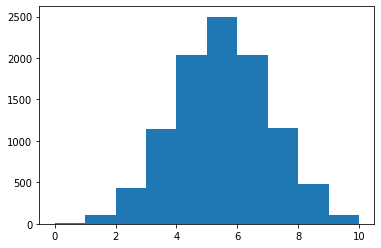

In [654]:
# Shows distribution of number of heads
plt.hist(np.random.binomial(n=10,p=0.5,size=10000));

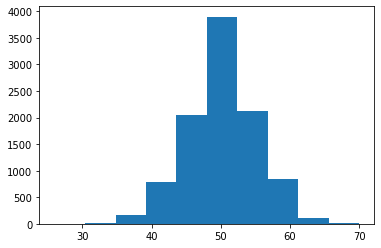

In [655]:
# Shows distribution of number of heads
plt.hist(np.random.binomial(n=100,p=0.5,size=10000));

## Binomial Distribution Quiz

1. A fair coin flip produces heads

$$ P(h) = 1/2$$

In [656]:
np.random.binomial(n=1, p=0.5, size=1000000).mean()

0.500183

2. Five fair coin flips produce exactly one heads

$$ {5 \choose 1} 0.5 * 0.5^4 = 0.15625 $$

In [657]:
(np.random.binomial(n=5,p=0.5, size = 1000000) == 4).mean()

0.155853

3. 10 fair coins flips produce exactly 4 heads

$$ {10 \choose 4} 0.5^4 0.5^6 = 0.205078$$


In [658]:
(np.random.binomial(n=10,p=0.5, size = 1000000) == 6).mean()

0.205178

4. Five biased coin flips with P(h)=0.8 produce exactly 5 heads

$$ {5 \choose 5} 0.8^5 = 0.32768$$

In [659]:
(np.random.binomial(n=5,p=0.2, size = 1000000) == 0).mean()

0.327237

5. Ten biased coin flips P(h) = 0.15 produce at least 3 heads

- We wil do this by summing the probability of 0 heads, 1 head and 2 head and subtracting it from 1

$$ 1 - ({10 \choose 0} 0.15^0 0.85^ {10} +  {10 \choose 1} 0.15^1 0.85^ 9 + {10 \choose 2} 0.15^2 0.85^ 8 ) = 1 - 0.82019648 = 0.17980352  $$

In [660]:
(np.random.binomial(n=10,p=0.85, size = 1000000) < 8).mean()

0.179592

In [661]:
np.random.binomial(n=10,p=0.85)

9

## Sampling Distributions and the Central Limits Theorem 

- A sampling distribution shows us how a statistic varies

- We will learn about sampling distributions here and we will need inferential statistics

- before we used probability functions, now we are thinking about 

    - we were using probability to draw conclusions now we will use data to draw conclusions
    
- Quick Recap of descriptie vs inferential statistics

    - descriptive: describing our collected data using measures of spread, center, shape of our distribution and outliers. We also use plots to better our understanding
    
    - inferential: using collected data to draw conclusions to a larger population
    
        - we need to take a sample that accurately represents our population of interest (so we make sure it isn't bias)
        
            - We need to be able to identify the popultion (entire group of interest), the parameter (numeric summary about the population), the sample (subset of the population), and the statistic (numeric summary about the sample)
            
                - statistics and parameters are generally the mean or the porportion for a group (statistic is value for the sample) (parameters being value for the population). And the population is the entire fgroup of interest where the sample is the subset of the populaiton
            
- Sampling distribution: a distribution of a statistic

   
    - as we take samples, our sampling distribution will change
    
    - if we take all of our samples of size 5 and plot them, that is our sampling distributiom
    
 
            
        

**Sampling Distributions Introduction**

In order to gain a bit more comfort with this idea of sampling distributions, let's do some practice in python.


Below is an array that represents the students we saw in the previous videos, where 1 represents the students that drink coffee, and 0 represents the students that do not drink coffee.

In [662]:
import numpy as np
np.random.seed(42)

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

1. Find the proportion of students who drink coffee in the above array. Store this value in a variable p.

In [663]:
p = len(students[students == 1]) / len(students)
p

0.7142857142857143

2. Use numpy's random.choice to simulate 5 draws from the students array. What is proportion of your sample drink coffee

In [664]:
sample = np.random.choice(students, 5)
len(sample[sample == 1]) / len(sample), sample.mean(), sample.var()

(0.6, 0.6, 0.24000000000000005)

In [665]:
sample_props = []
for _ in range(10000):
    sample = np.random.choice(students, 5)
    sample_props.append(len(sample[sample == 1]) / len(sample))
sample_props = np.array(sample_props)

In [666]:
# THis is the mean of the sampling distribution
sample_props.mean()

0.714

In [667]:
sample_props_5 = sample_props

5. What are the variance and standard deviation for the original 21 data values?

In [668]:
students.var(), students.std()

(0.20408163265306126, 0.45175395145262565)

6. What are the variance and standard deviation for the 10,000 proportions you created?

In [669]:
sample_props.var(), sample_props.std()

(0.041763999999999996, 0.2043624231604235)

7. Compute p(1-p), which of your answers does this most closely match?

In [670]:
# This is the variance of the population
p * (1-p)

0.20408163265306123

8. Compute p(1-p)/n, which of your answers does this most closely match?

In [671]:
# It is closest to the variance of the sample
p * (1-p) / 5

0.04081632653061225

9. Notice that your answer to 8. is commonly called the variance of the sampling distribution. If you were to change your first sample to be 20, what would this do for the variance of the sampling distribution? Simulate and calculate the new answers in 6. and 8. to check that the consistency you found before still holds

In [672]:
sample_props = []
for _ in range(10000):
    sample = np.random.choice(students, 20)
    sample_props.append(len(sample[sample == 1]) / len(sample))
sample_props = np.array(sample_props)

In [673]:
sample_props.mean()

0.714925

In [674]:
# These are the new variance and standard deviation for the
 # porportions
sample_props.var(), sample_props.std()

(0.010300994374999999, 0.10149381446669545)

In [675]:
# This is the new variance of the sampling distribution
p * (1-p) / 20

0.010204081632653062

Notice how they are now close together with the increased sample size. 

However it is interesting how the variance of the actual porportions is bigger still. Which makes sense

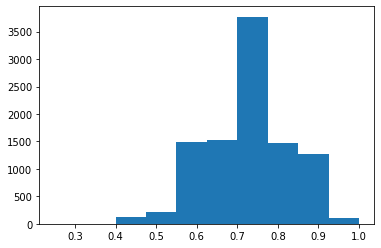

In [676]:
import matplotlib.pyplot as plt

plt.hist(sample_props);

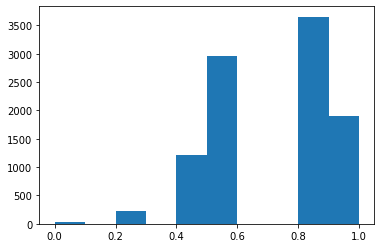

In [677]:
plt.hist(sample_props_5);

Conclusion:

- We have defined sampling distributions as the distribution of a statistic

    - we simulated the creation of sampling distributions of size 5 and size 20
    
- We have found that for porportions (means of 1 an 0 values), these caracteristics hold

    - the sampling distribution is centered on the original parameter value
    
    - the sampling distribution decreases its variance depending on the sample size used
    
        - specifically, the variance of the sampling distribution is equal to the variance of the origincal data divided by the sample sized used
    
    
- Random variable = $ X $ with variance = $ \sigma^2 $, then the distribution of $ \bar{X}$ has a variance of $ \frac{\sigma^2}{n}$

- Note that $ \bar{X}$ is the sampling distribituon of the sample mean $ \bar{x}$

## Parameters and statistics

Mean of dataset : $\mu,  \bar{x} $

Mean of dataset with only 0, 1 values (porportion): $ \pi,  \rho$

Difference in means: $ \mu_1 - \mu_2, \bar{x_1} - \bar{x_2}$

Difference in porportions: $ \pi_1 - \pi_2, p_1 - p_2$

Regression coefficient: $ \beta, b$

Standard deviation: $\sigma, s$

Variance: $\sigma^2, s^2$ 

Correlation  coefficient: $ \rho, r$

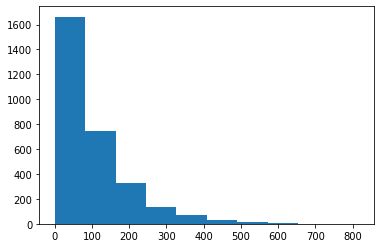

In [678]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

pop_data = np.random.gamma(1,100, 3000)
plt.hist(pop_data);

1. What is the population mean?

In [679]:
pop_data.mean()

100.35978700795846

2. Randomly select 10 draws from the population using numpy's random.choice. What is the sample mean for these 10 values?

In [680]:
sample = np.random.choice(pop_data, 10)

Sample mean: $ \bar{x} $

In [681]:
sample.mean() 

103.47556549464393

3. What is the sample standard deviation of your 10 draws $ s$?

In [682]:
sample.std()

130.00074035573317

4. What is the population standard deviation $ \sigma$ ?

In [683]:
pop_data.std()

99.77860187968906

5. What is the population variance $ \sigma^2$?

In [684]:
pop_data.var()

9955.76939306549

6. What is the sample variance $s^2$?

In [685]:
sample.var()

16900.192493038754

## Law of large numbers and Central Limits Theorem

- These two theorems are looked at a lot when looking at sampling distributions

- Law of large numbers

    - if we choose the right statistics to estimate a parameter the larger our sample size the closer our statistic  gets to the parameter
    
- How do we determine a sample mean would be best for population mean? How would we identify the relationship between parameter and statistic like this in the future?

    - estimation tequniques:
    
        - maximum liklihood estimation
        
        - method of moments estimation
        
        - bayseian estimation
        
   - these are beyond the scope of this course. But a data scientist mayneed to understand how to estimate a value that isn't as common as mean or variance
   
       - we would use one of these methods to determine best estimate

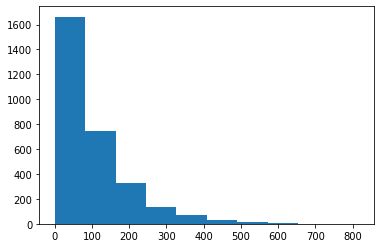

In [686]:

%matplotlib inline
np.random.seed(42)

# This is just setting up some random data in pop_data
# The functionality of the gamma distribution is not relevant 
# for this class.
pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

1. What is the the number of data values in our population dataset?

In [687]:
pop_data.shape[0]

3000

2. What is the population mean $ \mu$?

In [688]:
pop_data.mean()

100.35978700795846

3. Use numpy's `random.choice` to simulate 5 draws from the pop_data array. What is sample mean $\bar{x} $?

In [689]:
sample = np.random.choice(pop_data, 5)

In [690]:
sample.mean()

27.685829640608965

4. Use numpy's random.choice to simulate 20 draws from the pop_data array. What is sample mean?

In [691]:
sample_2 = np.random.choice(pop_data, 20)

In [692]:
sample_2.mean()

163.3701520126447

5. Use numpy's random.choice to simulate 100 draws from the pop_data array. What is sample mean?

In [693]:
sample_3 = np.random.choice(pop_data, 100)

In [694]:
sample_3.mean()

119.55076984115861

## Central Limits Theorem

- Pertains to sample mean $\bar{x}$ and sample porportion $p$ statistic

- with a large enough sampling size, the sampling distribution of the mean will be normally distributed

- also applices to difference in sample means and difference in sample porportions and other statistics, but not all statistics

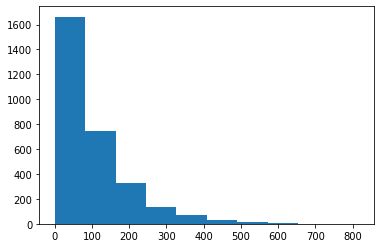

In [695]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

1. In order to create the sampling distribution for the average of 3 draws of this distribution, follow these steps:

a. Use numpy's random.choice to simulate 3 draws from the pop_data array. 

In [696]:
sample = np.random.choice(pop_data, 3)


b. Compute the mean of these 3 draws. 

In [697]:
sample.mean()

34.86585877838206

c. Write a loop to simulate this process 10,000 times, and store each mean into an array called means_size_3.

In [698]:
means_size_3 = []
for _ in range(10000):
    means_size_3.append(np.random.choice(pop_data, 3).mean())

d. Plot a histogram of your sample means.

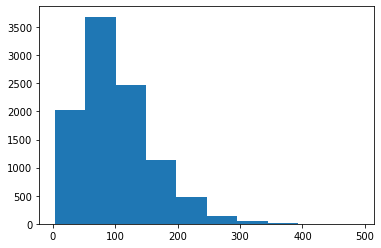

In [699]:
plt.hist(means_size_3);

In [700]:
simulation = np.array(means_size_3)

Mean: $\bar{X}$

In [701]:
simulation.mean()

100.87276259567305

STD DEV: $ \sigma_{X}$

In [702]:
simulation.std()

57.72348461511113

In [703]:
simulation.var()

3332.0006761109717

Mean: $\mu$

In [704]:
pop_data.mean()

100.35978700795846

STD DEV: $\sigma$

In [705]:
pop_data.std()

99.77860187968906

Conclusion: we used a sample of size 3 so we didn't get a normal distribution for our statistcs. We need a bigger sample size to make it work

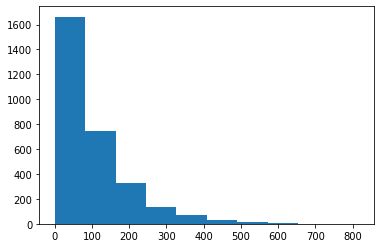

In [706]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

1. In order to create the sampling distribution for the average of 100 draws of this distribution, follow these steps:

In [707]:
pop_data.mean()

100.35978700795846

a. Use numpy's random.choice to simulate 100 draws from the pop_data array. 

In [708]:
sample = np.random.choice(pop_data, 100)

b. Compute the mean of these 100 draws. 

In [709]:
sample.mean()

115.89760480820178

c. Write a loop to simulate this process 10,000 times, and store each mean into an array called means_size_100.

In [710]:
means_size_100 = []
for _ in range(10000):
    means_size_100.append(np.random.choice(pop_data, 100).mean())

d. Plot a histogram of your sample means.

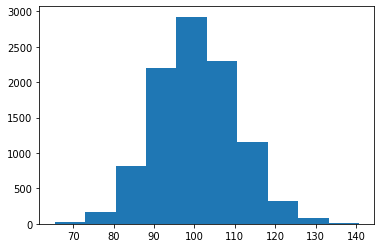

In [711]:
plt.hist(means_size_100);

In [712]:
sampling_distribution_100 = np.array(means_size_100)

$\bar{X}$

In [713]:
# Mean of sampling distribution
sampling_distribution_100.mean()

100.45707456518824

$s^2$ 

In [714]:
# variance of sampling distribution
sampling_distribution_100.var()

99.44037691417994

$\mu$

In [715]:
# Mean of population
pop_data.mean()

100.35978700795846

$\sigma^2$

In [716]:
# Variance of population
pop_data.var()

9955.76939306549

Notice the shrinking of the variance in the sampling distribution (3332.0006761109717 to 99.44)

Variance of the samlpling distribution is variance of popultion divided by sample size

In [717]:
pop_data.var() / 3

3318.5897976884967

In [718]:
pop_data.var() / 100

99.55769393065489

Notice how the above is true. And by increasing the sample size we see the law of large numbers comes true and our estimations resemble a normal distribution

So even though our population is right skewed, we still see that our estimations of the population mean are normally distributed by the Central Limits Theorem

## When does the CLT not work

- What does it mean for the sample size to be large enough?

    - n = 10, 100, 1000???
    
- We can memorize a list of statistics where CLT applies

     - mean, porportion, difference in mean, difference in porpotion
     
 - doesn't work for:

     - variance, correlation coefficient, max value in dataset
     
- with all the computational power, the CLT is still useful for some sampling distributions

    - what if instead of relying on this theorem we just simulated whatever sampling distribution we were interested in instead
    
    - We will see in the age of big data we rely on this theorem less

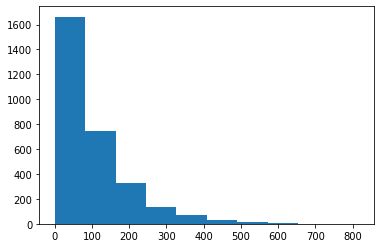

In [719]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

1. In order to create the sampling distribution for the variance of 100 draws of this distribution, follow these steps:

Use numpy's random.choice to simulate 100 draws from the pop_data array. 

In [720]:
sample = np.random.choice(pop_data, 100)

b. Compute the variance of these 100 draws. 

In [721]:
sample.var()

12098.749344943082

c. Write a loop to simulate this process 10,000 times, and store each variance into an array called var_size_100.

In [722]:
var_size_100 = []
for _ in range(10000):
    var_size_100.append(np.random.choice(pop_data, 100).var())

d. Plot a histogram of your sample variances.

In [723]:
simulation_var_100 = np.array(var_size_100)

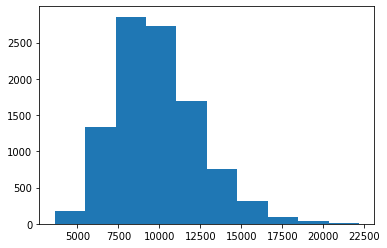

In [724]:
plt.hist(simulation_var_100);

Population Variance $ \sigma^2 $

In [725]:
pop_data.var()

9955.76939306549

Mean Sample distribution Of Variances: $\bar{X}$

In [726]:
simulation_var_100.mean()

9874.361793621825

Variance of sample distributin of variance: $\sigma^2$

In [727]:
simulation_var_100.var()

6508086.114509583

If CLT worked, this should be the variance of sampling distribution, but it isnt

In [728]:
pop_data.var() / 100

99.55769393065489

Note: although it isn't normally distributed as sample size increases it approaches a chi squared distribution

## Bootstrapping

- Because we see the gaps in usefullness of CLT of not knowing when our sample size is big enough and it not working with all statistics

- Bootstrapping is sampling with replacement

    - we can use bootstrapping to simulate sampling distributions
    
    - `random.choice` samples this way, where we have a probability and we can choose it multiple times
    
    - rolling a die or flipping a coint does it this way also
    
- It works with any statistics

- Goal: we want to use statistics to infer population about a parameter

    - imagine we treat our sample as if it was entire population
    
    - if they are truly representative of our population, we can bootstrap sample from them and understand how the porortion of coffee drinkers might change from a sample to the next


In [729]:
np.random.seed(42)

die_vals = np.array([1,2,3,4,5,6])

1. Take a random sample of 20 values from die_vals using the code below, then answer the question in the first quiz below.

In [730]:
sample = np.random.choice(die_vals, size=20)

In [734]:
sample

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4])

In [731]:
# This code breaks because we are sampling without replacement
# for a small population
sample_2 = np.random.choice(die_vals, replace=False, size=20)

ValueError: Cannot take a larger sample than population when 'replace=False'

Bootstrapping lets us draw inference about a parameter from performing sampling from our own sample is great

we don't need additional data to gain confidence about where our parameter is without collecting additional data

Why are sampling distributions important in practice

    - when we learn about inference they will be used a lot
    
    - we will learn about confidence intervals and hypothesis testing
    
    - understnding sampling distributions and bootstrapping allows us to understand built in techniques (like in a calculator) and understand how to use it in other situations